In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import keras
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
%matplotlib inline

In [2]:
np.random.seed(0)

In [3]:
n_pts = 500
centers = [[-1, 1], [-1, -1], [1, -1]]
X, y = datasets.make_blobs(n_samples=n_pts, random_state=123, centers=centers, cluster_std=0.4)

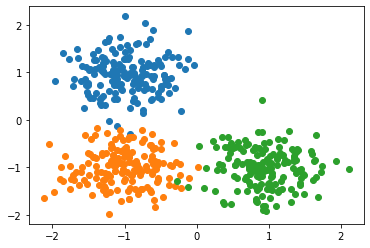

In [4]:
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.scatter(X[y==2, 0], X[y==2, 1])

In [5]:
# apply one hot encoding
y_cat = to_categorical(y, 3)
print(y_cat)

[[0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 ...
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]]


In [6]:
model = Sequential()
model.add(Dense(units=3, input_shape=(2,), activation='softmax'))
model.compile(Adam(learning_rate=0.1), loss='categorical_crossentropy', metrics=['accuracy'])

In [7]:
h = model.fit(x=X, y=y_cat, verbose=1, batch_size=50, epochs= 100, shuffle=True)

Epoch 1/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6659 - accuracy: 0.7700
Epoch 2/100
10/10 [==============================] - 0s 3ms/step - loss: 0.2140 - accuracy: 0.9800
Epoch 3/100
10/10 [==============================] - 0s 3ms/step - loss: 0.1121 - accuracy: 0.9860
Epoch 4/100
10/10 [==============================] - 0s 3ms/step - loss: 0.0842 - accuracy: 0.9860
Epoch 5/100
10/10 [==============================] - 0s 2ms/step - loss: 0.0708 - accuracy: 0.9880
Epoch 6/100
10/10 [==============================] - 0s 2ms/step - loss: 0.0634 - accuracy: 0.9880
Epoch 7/100
10/10 [==============================] - 0s 2ms/step - loss: 0.0586 - accuracy: 0.9880
Epoch 8/100
10/10 [==============================] - 0s 2ms/step - loss: 0.0549 - accuracy: 0.9880
Epoch 9/100
10/10 [==============================] - 0s 2ms/step - loss: 0.0523 - accuracy: 0.9880
Epoch 10/100
10/10 [==============================] - 0s 2ms/step - loss: 0.0495 - accuracy: 0.9880
Epoch 11/

10/10 [==============================] - 0s 2ms/step - loss: 0.0262 - accuracy: 0.9900
Epoch 83/100
10/10 [==============================] - 0s 2ms/step - loss: 0.0258 - accuracy: 0.9900
Epoch 84/100
10/10 [==============================] - 0s 2ms/step - loss: 0.0261 - accuracy: 0.9900
Epoch 85/100
10/10 [==============================] - 0s 1ms/step - loss: 0.0256 - accuracy: 0.9900
Epoch 86/100
10/10 [==============================] - 0s 2ms/step - loss: 0.0261 - accuracy: 0.9900
Epoch 87/100
10/10 [==============================] - 0s 2ms/step - loss: 0.0254 - accuracy: 0.9920
Epoch 88/100
10/10 [==============================] - 0s 2ms/step - loss: 0.0261 - accuracy: 0.9900
Epoch 89/100
10/10 [==============================] - 0s 2ms/step - loss: 0.0257 - accuracy: 0.9900
Epoch 90/100
10/10 [==============================] - 0s 2ms/step - loss: 0.0257 - accuracy: 0.9900
Epoch 91/100
10/10 [==============================] - 0s 2ms/step - loss: 0.0254 - accuracy: 0.9900
Epoch 92/100


Text(0.5, 0, 'epoch')

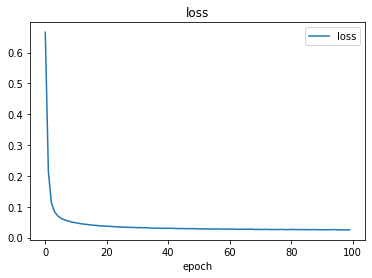

In [8]:


plt.plot(h.history['loss'])
plt.legend(['loss'])
plt.title('loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

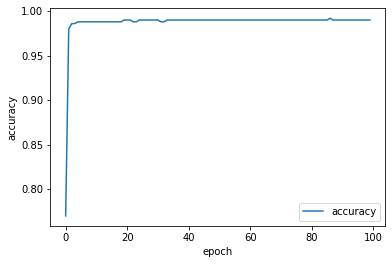

In [9]:
plt.plot(h.history['accuracy'])
plt.legend(['accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')

In [10]:
def plot_multiclass_decision_boundary(X, y, model):
    x_span = np.linspace(min(X[:, 0]) -1, max(X[:, 0]) + 1)
    y_span = np.linspace(min(X[:, 1]) -1, max(X[:, 1]) + 1)
    xx, yy = np.meshgrid(x_span, y_span)
    grid = np.c_[xx.ravel(), yy.ravel()]
    pred_x = model.predict(grid)
    pred_func = np.argmax(pred_x, axis=1)
    z = pred_func.reshape(xx.shape)
    plt.contourf(xx, yy, z)

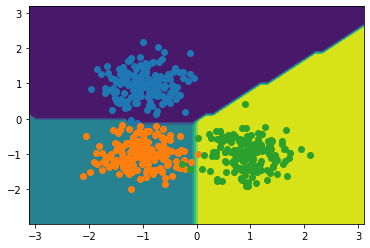

In [11]:
plot_multiclass_decision_boundary(X, y_cat, model)
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.scatter(X[y==2, 0], X[y==2, 1])

Prediction is:  [[0.01402711 0.9768761  0.00909682]]


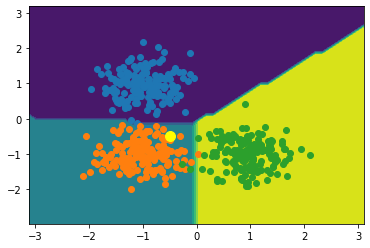

In [12]:
plot_multiclass_decision_boundary(X, y_cat, model)
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.scatter(X[y==2, 0], X[y==2, 1])

x = -0.5
y = -0.5
 
point = np.array([[x, y]])
prediction = model.predict(point)
plt.plot([x], [y], marker='o', markersize=10, color="yellow")
print("Prediction is: ", prediction)